# **Deep Learning**
#  Are Pandas more like Cats or like Dogs?

STEPS TO TRANSFER A KAGGLE API TOKEN (JSON FILE), FROM YOUR OWN PC TO THE MACHINE THAT WILL RUN YOUR COLAB SESSION

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sachinkomati23","key":"1a08300ee3f9be50211afec5f1c607f9"}'}

 Now create the folder where Kaggle will look for the JSON file
 and copy it there, so Kaggle will find it

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# bringing in the dataset
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

100% 376M/376M [00:17<00:00, 24.0MB/s]
100% 376M/376M [00:17<00:00, 22.6MB/s]


In [ ]:
pwd

'/content'

In [ ]:
ls

animal-image-datasetdog-cat-and-panda.zip  kaggle.json  sample_data/


In [ ]:
# Quietly UNZIP the file  animal-image-datasetdog-cat-and-panda.zip
!unzip -qq animal-image-datasetdog-cat-and-panda.zip

In [ ]:
ls

animal-image-datasetdog-cat-and-panda.zip  images/      sample_data/
animals/                                   kaggle.json


In [ ]:
cd 

/root


In [ ]:
#creating another directory to copy all the files from the original directory
#so that these files in the new directory can later be used for the CATS vs PANDAS CNN models
mkdir content1

In [ ]:
ls

content1/


In [ ]:
cd 

/root


In [ ]:
!ls /

bin	 dev   lib32   mnt			 python-apt  srv    usr
boot	 etc   lib64   NGC-DL-CONTAINER-LICENSE  root	     sys    var
content  home  libx32  opt			 run	     tmp
datalab  lib   media   proc			 sbin	     tools


In [ ]:
cd /content

/content


In [ ]:
pwd

'/content'

In [ ]:
ls

animal-image-datasetdog-cat-and-panda.zip  images/      sample_data/
animals/                                   kaggle.json


In [ ]:
#copying all the files from the /content directory to the new directory that is /root/content1
cp -r * /root/content1

In [ ]:
#checking all the files are copied
ls

animal-image-datasetdog-cat-and-panda.zip  images/      sample_data/
animals/                                   kaggle.json


In [ ]:
cd /root/content1

/root/content1


In [ ]:
ls

animal-image-datasetdog-cat-and-panda.zip  images/      sample_data/
animals/                                   kaggle.json


In [ ]:
pwd

'/root/content1'

In [ ]:
#Going back to the original directory to work with the DOGS vs PANDAS CNN models
cd /content

/content


In [ ]:
pwd

'/content'

In [ ]:
!ls -l ./animals

total 116
drwxr-xr-x 5 root root  4096 Apr 13 04:59 animals
drwxr-xr-x 2 root root 36864 Apr 13 04:59 cats
drwxr-xr-x 2 root root 36864 Apr 13 04:59 dogs
drwxr-xr-x 2 root root  4096 Apr 13 04:59 images
drwxr-xr-x 2 root root 36864 Apr 13 04:59 panda


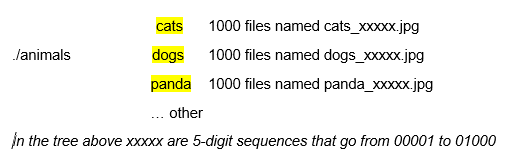

#**[PART I]: Initial Reorganization of the data**

NOW TRYING TO CREATE THE NEW DIRECTORY STRUCTURE

Under newanim we want 3 subdirectories: train, validation and test

within EACH of those 3, will have 3 subdirectories: cats, dogs & panda

NOTICE there is no final "s" is in panda

That is also true regarding the individual filenames: cats_00001.jpg but panda_00001.jpg

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path('animals')
new_base_dir = pathlib.Path('newanim')
def make_subset(subset_name, start_index, end_index):
  for category in ('cats', 'dogs', 'panda'):
    dir = new_base_dir / subset_name / category
    dirsrc = original_dir / category
    os.makedirs(dir)
    fnames = ['{}_{:05d}.jpg'.format(category, i)
                  for i in range(start_index, end_index)]
    for fname in fnames:
     shutil.copyfile(src=dirsrc / fname , dst=dir / fname)  

In [ ]:
make_subset('train', start_index=1, end_index=701)
make_subset('validation', start_index=701, end_index=901)
make_subset('test', start_index=901, end_index=1001)

In [ ]:
# verify the 3 subdirectories were created
!ls -l ./newanim/

total 12
drwxr-xr-x 5 root root 4096 Apr 13 05:03 test
drwxr-xr-x 5 root root 4096 Apr 13 05:03 train
drwxr-xr-x 5 root root 4096 Apr 13 05:03 validation


AT THIS POINT YOU HAVE THIS DIRECTORY STRUCTURE:

WE HAVE: TRAIN, VALIDATION & TEST DIRECTORIES

AND EACH ONE OF THEM HAS CATS, DOGS AND PANDA SUBDIRECTORIES

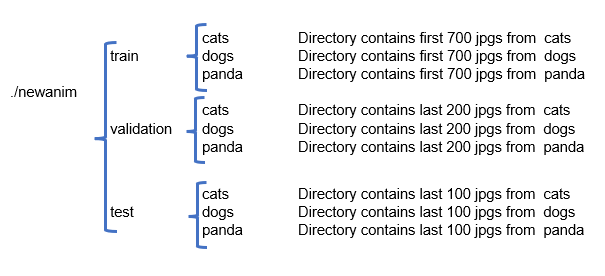

ALL THE STEPS UP TO THIS POINT ARE NEEDED TO PREPARE THE DATA

FOR BOTH PANDAS VS. DOGS AND PANDAS VS. CATS



# **[PART II]: The Panda -vs- Dog Classifier**

NOW, THE FOLLOWING CELLS WILL LEAVE DATA FOR DOGS vs PANDAS ONLY
FOR THAT WE WILL REMOVE THE 3 CATS SUBDIRECTORIES, TO CONTINUE WORKING WITH JUST PANDAS VS DOGS

# **II.0 Creation of the TF Datasets (train, validation, test) for Panda-vs-Dog classification**

In [ ]:
!ls ./newanim/train/

cats  dogs  panda


In [ ]:
!rm -r ./newanim/train/cats/

In [ ]:
!ls ./newanim/train/

dogs  panda


In [ ]:
# SIMILARLY, we will REMOVE the CATS subdirectories in validation and test
!rm -r ./newanim/validation/cats/
!rm -r ./newanim/test/cats/

This should yield:

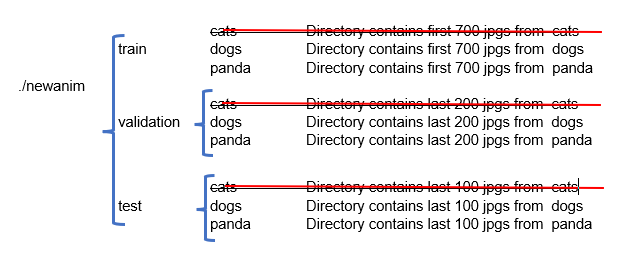

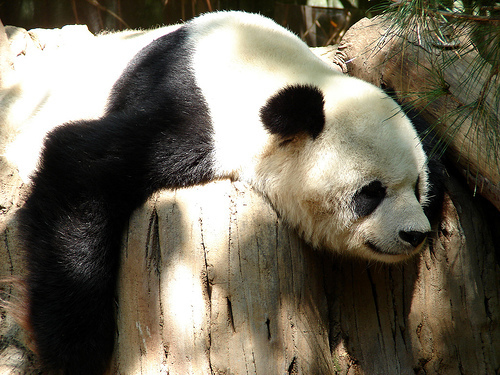

In [ ]:
from IPython import display
display.Image("./newanim/train/panda/panda_00344.jpg")

In [ ]:
!ls ./newanim/validation/
!ls ./newanim/test/

dogs  panda
dogs  panda


NOW using Listing 8.9 (from textbook) to create the TF Datasets

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
	new_base_dir / 'train',
	image_size=(180, 180),
	batch_size=32)
validation_dataset = image_dataset_from_directory(
	new_base_dir / 'validation',
	image_size=(180, 180),
	batch_size=32)
test_dataset = image_dataset_from_directory(
 	new_base_dir / 'test',
  	image_size=(180, 180),
   	batch_size=32)

Found 1400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


NOW WE WILL DEFINE, COMPILE AND TRAIN A CNN FOR CLASSIFYING DOGS-VS-PANDAS

#**II.1 - Developing a first, relatively simple CNN model named pvdm1 to classify Panda vs. Dog. – without dropout, parameter regularization (L1, L2 norm) or data augmentation in this first model.**


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
preliminary_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
preliminary_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

Configuring the model for training

In [ ]:
preliminary_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fitting the model using a Dataset without callbacks as it is a preliminary model

In [ ]:

history = preliminary_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    )

Epoch 1/30
44/44 [==============================] - 4s 54ms/step - loss: 0.6436 - accuracy: 0.6421 - val_loss: 0.4883 - val_accuracy: 0.7750
Epoch 2/30
44/44 [==============================] - 2s 45ms/step - loss: 0.5119 - accuracy: 0.8136 - val_loss: 0.3367 - val_accuracy: 0.8575
Epoch 3/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3321 - accuracy: 0.8521 - val_loss: 0.3159 - val_accuracy: 0.8775
Epoch 4/30
44/44 [==============================] - 2s 46ms/step - loss: 0.2958 - accuracy: 0.8900 - val_loss: 1.4167 - val_accuracy: 0.5775
Epoch 5/30
44/44 [==============================] - 2s 45ms/step - loss: 0.3005 - accuracy: 0.8971 - val_loss: 0.2286 - val_accuracy: 0.9100
Epoch 6/30
44/44 [==============================] - 2s 50ms/step - loss: 0.2648 - accuracy: 0.8950 - val_loss: 0.2325 - val_accuracy: 0.9100
Epoch 7/30
44/44 [==============================] - 2s 48ms/step - loss: 0.1913 - accuracy: 0.9236 - val_loss: 0.1809 - val_accuracy: 0.9275
Epoch 8/30
44

Displaying curves of loss and accuracy during training

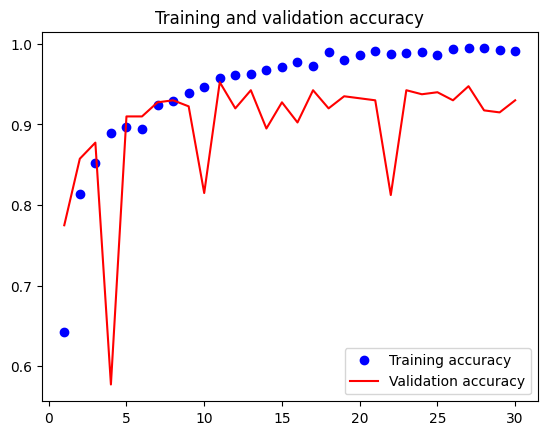

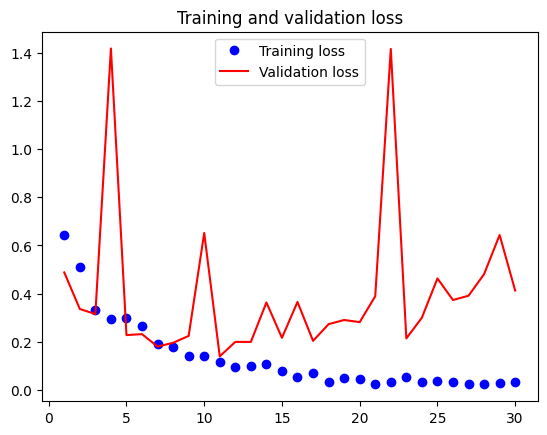

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [ ]:
test_loss, test_acc = preliminary_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 13ms/step - loss: 0.5965 - accuracy: 0.9100
Test accuracy: 0.910


**pvdm1 : the model stopped after an advantageous number of epochs USING CALLBACKS**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
pvdm1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
pvdm1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

In [ ]:
#Configuring the model for training

pvdm1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
        ),
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history = pvdm1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
44/44 [==============================] - 5s 53ms/step - loss: 0.6060 - accuracy: 0.6671 - val_loss: 0.6247 - val_accuracy: 0.6225
Epoch 2/30
44/44 [==============================] - 2s 47ms/step - loss: 0.4049 - accuracy: 0.8307 - val_loss: 0.3804 - val_accuracy: 0.8275
Epoch 3/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3019 - accuracy: 0.8864 - val_loss: 0.2201 - val_accuracy: 0.9025
Epoch 4/30
44/44 [==============================] - 2s 45ms/step - loss: 0.2489 - accuracy: 0.9093 - val_loss: 0.2747 - val_accuracy: 0.8950
Epoch 5/30
44/44 [==============================] - 3s 53ms/step - loss: 0.2049 - accuracy: 0.9229 - val_loss: 0.3154 - val_accuracy: 0.8725


Displaying curves of loss and accuracy during training

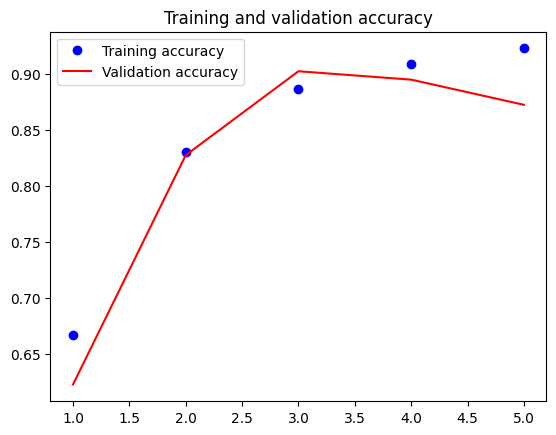

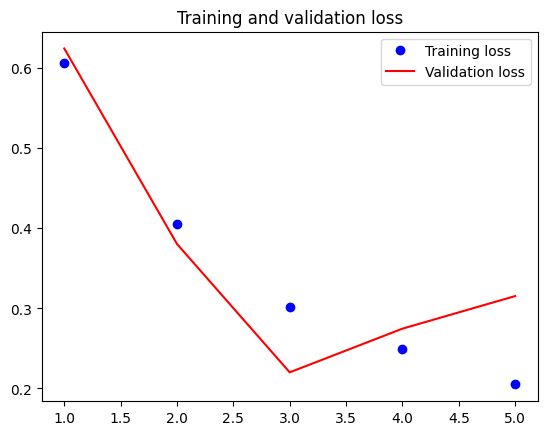

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**


In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 12ms/step - loss: 0.2234 - accuracy: 0.9350
Test accuracy: 0.935


# **II.2 -Developing a second, further improved CNN model named pvdm2 to classify Panda vs Dog using parameter regularization and then adding dropout**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid")(x)
pvdm_L2_reg = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvdm_L2_reg.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="L2regularizer.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_l2_reg = pvdm_L2_reg.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
44/44 [==============================] - 4s 52ms/step - loss: 1.1457 - accuracy: 0.6443 - val_loss: 3.2176 - val_accuracy: 0.5125
Epoch 2/30
44/44 [==============================] - 2s 47ms/step - loss: 0.8048 - accuracy: 0.7964 - val_loss: 0.6042 - val_accuracy: 0.8675
Epoch 3/30
44/44 [==============================] - 2s 47ms/step - loss: 0.6052 - accuracy: 0.8471 - val_loss: 0.4825 - val_accuracy: 0.8850
Epoch 4/30
44/44 [==============================] - 2s 47ms/step - loss: 0.4702 - accuracy: 0.8793 - val_loss: 0.4130 - val_accuracy: 0.8850
Epoch 5/30
44/44 [==============================] - 3s 54ms/step - loss: 0.3765 - accuracy: 0.9014 - val_loss: 0.4309 - val_accuracy: 0.8625
Epoch 6/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3564 - accuracy: 0.8879 - val_loss: 0.2903 - val_accuracy: 0.9175
Epoch 7/30
44/44 [==============================] - 2s 47ms/step - loss: 0.3241 - accuracy: 0.9071 - val_loss: 0.2544 - val_accuracy: 0.9200
Epoch 8/30
44

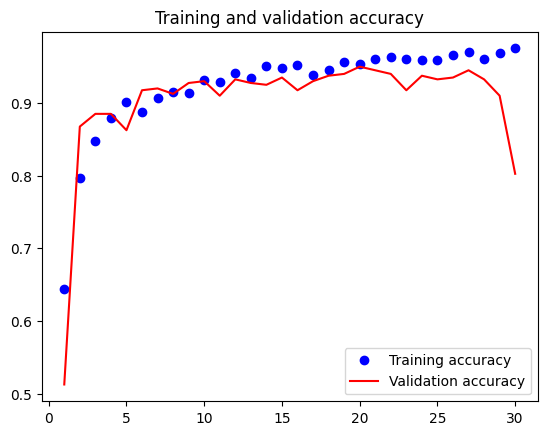

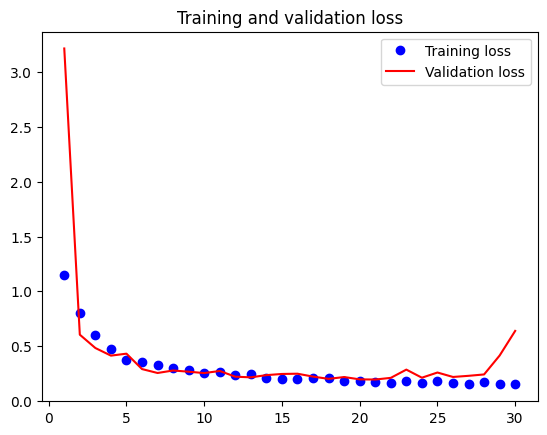

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_l2_reg.history["accuracy"]
val_accuracy = history_l2_reg.history["val_accuracy"]
loss = history_l2_reg.history["loss"]
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**


In [ ]:
test_model = keras.models.load_model("L2regularizer.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 13ms/step - loss: 0.2365 - accuracy: 0.9300
Test accuracy: 0.930


# **pvdm2 using dropout with parameter regularization**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid")(x)
pvdm2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvdm2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    
    keras.callbacks.ModelCheckpoint(
        filepath="pvdm2.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_pvdm2 = pvdm2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
44/44 [==============================] - 4s 50ms/step - loss: 1.1527 - accuracy: 0.5950 - val_loss: 3.1740 - val_accuracy: 0.5000
Epoch 2/30
44/44 [==============================] - 2s 46ms/step - loss: 0.7935 - accuracy: 0.8014 - val_loss: 0.5456 - val_accuracy: 0.8900
Epoch 3/30
44/44 [==============================] - 2s 45ms/step - loss: 0.5787 - accuracy: 0.8593 - val_loss: 0.8737 - val_accuracy: 0.7675
Epoch 4/30
44/44 [==============================] - 2s 48ms/step - loss: 0.4775 - accuracy: 0.8600 - val_loss: 0.5349 - val_accuracy: 0.8425
Epoch 5/30
44/44 [==============================] - 3s 50ms/step - loss: 0.4249 - accuracy: 0.8800 - val_loss: 0.3756 - val_accuracy: 0.9000
Epoch 6/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3732 - accuracy: 0.8907 - val_loss: 0.4172 - val_accuracy: 0.8625
Epoch 7/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3516 - accuracy: 0.8871 - val_loss: 0.3356 - val_accuracy: 0.9000
Epoch 8/30
44

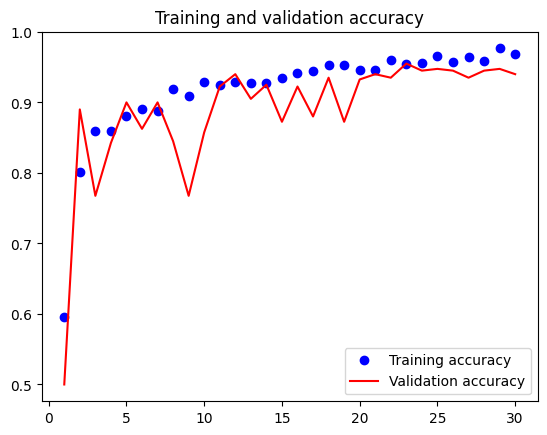

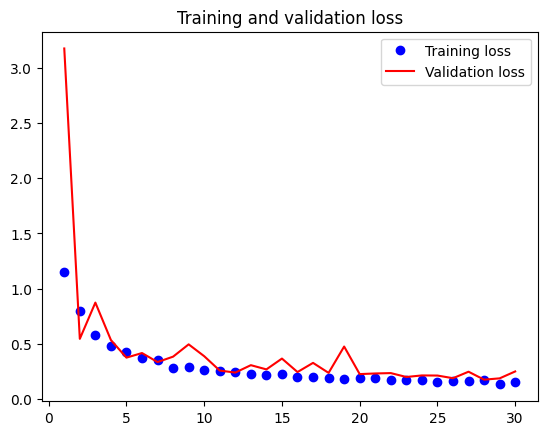

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_pvdm2.history["accuracy"]
val_accuracy = history_pvdm2.history["val_accuracy"]
loss = history_pvdm2.history["loss"]
val_loss = history_pvdm2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
pvdm2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_65 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

In [ ]:
test_model = keras.models.load_model("pvdm2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 12ms/step - loss: 0.1794 - accuracy: 0.9500
Test accuracy: 0.950


# **II.3 -Developing a third CNN model, named pvdm3 USING DATA AUGMENTATION FOR ITS TRAINING**.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.GaussianNoise(stddev=0.1),
        layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
        layers.RandomCrop(height=200, width=200),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, kernel_regularizer=regularizers.l2(0.002), activation="sigmoid")(x)
pvdm3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvdm3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="pvdm3.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_pvdm3 = pvdm3.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/100
44/44 [==============================] - 4s 53ms/step - loss: 1.3971 - accuracy: 0.5779 - val_loss: 0.9690 - val_accuracy: 0.7625
Epoch 2/100
44/44 [==============================] - 2s 47ms/step - loss: 0.8064 - accuracy: 0.7793 - val_loss: 0.7143 - val_accuracy: 0.7975
Epoch 3/100
44/44 [==============================] - 2s 46ms/step - loss: 0.5828 - accuracy: 0.8321 - val_loss: 0.5553 - val_accuracy: 0.8025
Epoch 4/100
44/44 [==============================] - 2s 46ms/step - loss: 0.4378 - accuracy: 0.8721 - val_loss: 0.3818 - val_accuracy: 0.8825
Epoch 5/100
44/44 [==============================] - 2s 45ms/step - loss: 0.4021 - accuracy: 0.8836 - val_loss: 0.4072 - val_accuracy: 0.8650
Epoch 6/100
44/44 [==============================] - 2s 49ms/step - loss: 0.3677 - accuracy: 0.8800 - val_loss: 0.3219 - val_accuracy: 0.8950
Epoch 7/100
44/44 [==============================] - 2s 48ms/step - loss: 0.3492 - accuracy: 0.8893 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 

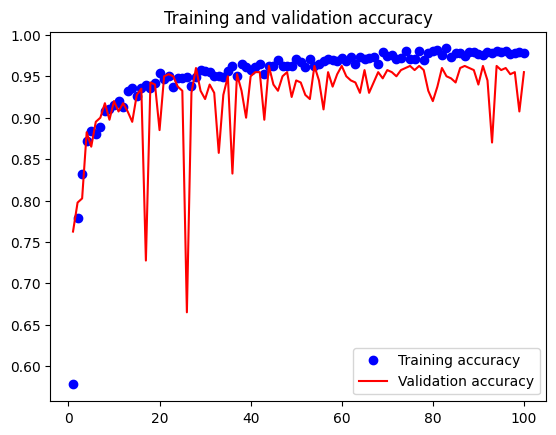

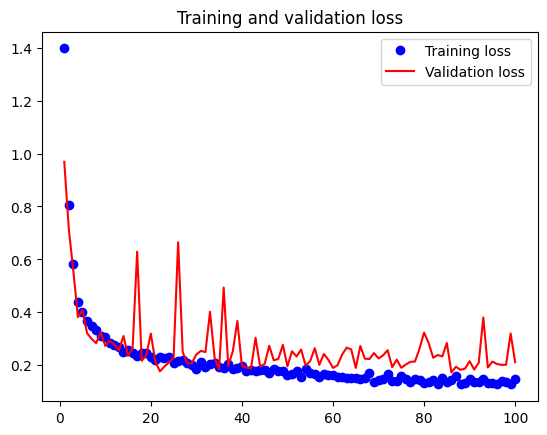

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_pvdm3.history["accuracy"]
val_accuracy = history_pvdm3.history["val_accuracy"]
loss = history_pvdm3.history["loss"]
val_loss = history_pvdm3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
pvdm3.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_15 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("pvdm3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 15ms/step - loss: 0.2086 - accuracy: 0.9600
Test accuracy: 0.960


# **[PART III]: The Panda -vs- Cat Classifier**

In [ ]:
pwd

'/content'

In [ ]:
#changing the directory as mentioned in the starting which was created separately for the Panda Vs Cat Classifiers
cd /root/content1/

/root/content1


In [ ]:
pwd

'/root/content1'

In [ ]:
ls

animal-image-datasetdog-cat-and-panda.zip  images/      sample_data/
animals/                                   kaggle.json


In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path('animals')
new_base_dir = pathlib.Path('newanim')
def make_subset(subset_name, start_index, end_index):
  for category in ('cats', 'dogs', 'panda'):
    dir = new_base_dir / subset_name / category
    dirsrc = original_dir / category
    os.makedirs(dir)
    fnames = ['{}_{:05d}.jpg'.format(category, i)
                  for i in range(start_index, end_index)]
    for fname in fnames:
     shutil.copyfile(src=dirsrc / fname , dst=dir / fname) 

In [ ]:
make_subset('train', start_index=1, end_index=701)
make_subset('validation', start_index=701, end_index=901)
make_subset('test', start_index=901, end_index=1001)

In [ ]:
pwd

'/root/content1'

In [ ]:
# verify the 3 subdirectories were created
!ls -l ./newanim/

total 12
drwxr-xr-x 5 root root 4096 Apr 13 05:15 test
drwxr-xr-x 5 root root 4096 Apr 13 05:15 train
drwxr-xr-x 5 root root 4096 Apr 13 05:15 validation


AT THIS POINT YOU HAVE THIS DIRECTORY STRUCTURE:

WE HAVE: TRAIN, VALIDATION & TEST DIRECTORIES

AND EACH ONE OF THEM HAS CATS, DOGS AND PANDA SUBDIRECTORIES

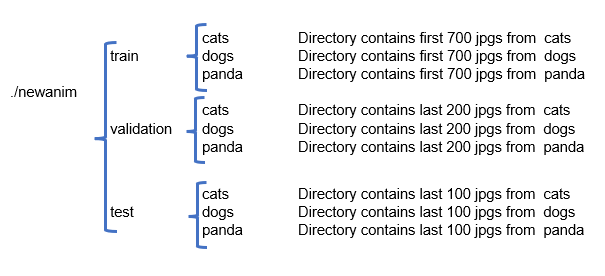

ALL THE STEPS UP TO THIS POINT ARE NEEDED TO PREPARE THE DATA PANDAS VS. CATS

NOW, THE FOLLOWING CELLS WILL LEAVE DATA FOR CATS vs PANDAS ONLY

FOR THAT WE WILL REMOVE THE 3 DOGS SUBDIRECTORIES, TO CONTINUE WORKING WITH JUST PANDAS VS CATS

In [ ]:
!ls ./newanim/train/

cats  panda


In [ ]:
!rm -r ./newanim/train/dogs/

rm: cannot remove './newanim/train/dogs/': No such file or directory


In [ ]:
!ls ./newanim/train/

cats  panda


In [ ]:
# SIMILARLY, we will REMOVE the CATS subdirectories in validation and test
!rm -r ./newanim/validation/dogs/
!rm -r ./newanim/test/dogs/

rm: cannot remove './newanim/validation/dogs/': No such file or directory
rm: cannot remove './newanim/test/dogs/': No such file or directory


In [ ]:
ls

animal-image-datasetdog-cat-and-panda.zip  kaggle.json          pvcm3.keras
animals/                                   L2regularizer.keras  pvdm2.keras
convnet_from_scratch.keras                 newanim/             pvdm3.keras
images/                                    pvcm2.keras          sample_data/


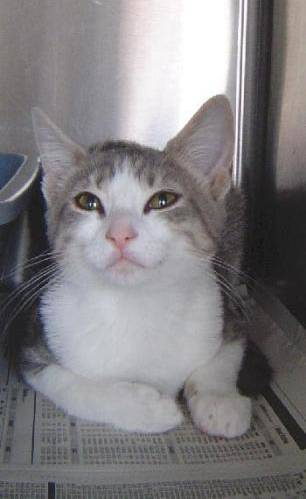

In [ ]:
from IPython import display
display.Image("/root/content1/newanim/test/cats/cats_00904.jpg")

# **III.0 – Obtaining the TF Datasets (Train, Validation and test) for Pandas vs Cats classification. – To create appropriate TF datasets for the Pandas vs Cats classification.**

NOW using Listing 8.9 (from textbook) to create the TF Datasets

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
	new_base_dir / 'train',
	image_size=(180, 180),
	batch_size=32)
validation_dataset = image_dataset_from_directory(
	new_base_dir / 'validation',
	image_size=(180, 180),
	batch_size=32)
test_dataset = image_dataset_from_directory(
 	new_base_dir / 'test',
  	image_size=(180, 180),
   	batch_size=32)

Found 1400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


NOW WE WILL DEFINE, COMPILE AND TRAIN A CNN FOR CLASSIFYING CATS-VS-PANDAS

**Instantiating a small convnet for PANDAS vs. CATS classification**

# **III.1 - Developing a first, relatively simple CNN model named pvcm1 to classify Panda vs. Cat. – without dropout, parameter regularization (L1, L2 norm) or data augmentation in this first model.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
preliminary_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
preliminary_model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_28 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_140 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 89, 89, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_113 (MaxPooli  (None, 43, 43, 64)       0         
 ng2D)                                                    

CONFIGURING THE MODEL FOR TRAINING

In [ ]:
preliminary_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fitting the model using a Dataset without callbacks as it is a preliminary model

In [ ]:
history = preliminary_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    )

Epoch 1/30
44/44 [==============================] - 4s 52ms/step - loss: 0.6773 - accuracy: 0.7050 - val_loss: 0.4588 - val_accuracy: 0.8175
Epoch 2/30
44/44 [==============================] - 2s 48ms/step - loss: 0.3816 - accuracy: 0.8457 - val_loss: 0.3578 - val_accuracy: 0.8700
Epoch 3/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3516 - accuracy: 0.8764 - val_loss: 0.3137 - val_accuracy: 0.8800
Epoch 4/30
44/44 [==============================] - 3s 55ms/step - loss: 0.2646 - accuracy: 0.9043 - val_loss: 0.2979 - val_accuracy: 0.8850
Epoch 5/30
44/44 [==============================] - 2s 46ms/step - loss: 0.2365 - accuracy: 0.9050 - val_loss: 0.2396 - val_accuracy: 0.8925
Epoch 6/30
44/44 [==============================] - 2s 45ms/step - loss: 0.2368 - accuracy: 0.9150 - val_loss: 0.5056 - val_accuracy: 0.7950
Epoch 7/30
44/44 [==============================] - 2s 45ms/step - loss: 0.1992 - accuracy: 0.9243 - val_loss: 0.2255 - val_accuracy: 0.9075
Epoch 8/30
44

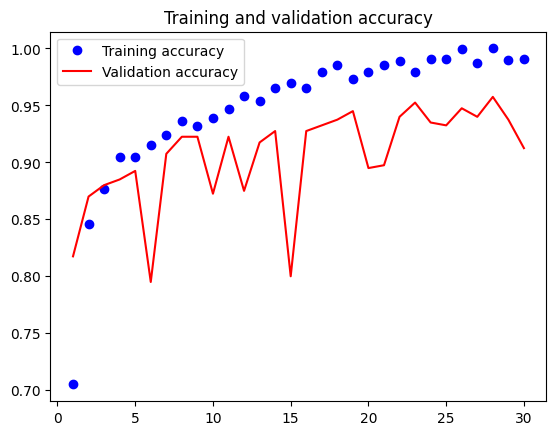

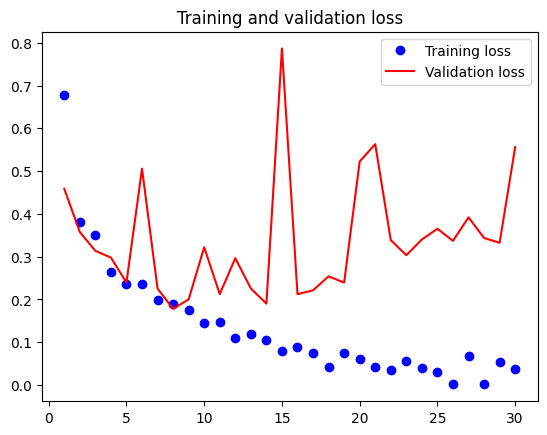

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

EVALUATING THE MODEL ON THE TEST SET

In [ ]:
test_loss, test_acc = preliminary_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 12ms/step - loss: 0.5699 - accuracy: 0.9250
Test accuracy: 0.925


# **pvcm1 : the model stopped after an advantageous number of epochs USING CALLBACKS**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
pvcm1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvcm1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
        ),
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_pvcm1 = pvcm1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
44/44 [==============================] - 4s 51ms/step - loss: 0.6403 - accuracy: 0.6364 - val_loss: 0.4250 - val_accuracy: 0.8150
Epoch 2/30
44/44 [==============================] - 2s 46ms/step - loss: 0.4346 - accuracy: 0.8314 - val_loss: 0.3329 - val_accuracy: 0.8700
Epoch 3/30
44/44 [==============================] - 2s 44ms/step - loss: 0.2903 - accuracy: 0.8914 - val_loss: 0.6712 - val_accuracy: 0.8050
Epoch 4/30
44/44 [==============================] - 2s 49ms/step - loss: 0.2802 - accuracy: 0.8879 - val_loss: 0.2432 - val_accuracy: 0.9100
Epoch 5/30
44/44 [==============================] - 2s 45ms/step - loss: 0.2448 - accuracy: 0.9100 - val_loss: 0.1816 - val_accuracy: 0.9275
Epoch 6/30
44/44 [==============================] - 2s 44ms/step - loss: 0.1883 - accuracy: 0.9293 - val_loss: 0.3750 - val_accuracy: 0.8875
Epoch 7/30
44/44 [==============================] - 2s 44ms/step - loss: 0.2057 - accuracy: 0.9207 - val_loss: 0.1852 - val_accuracy: 0.9250


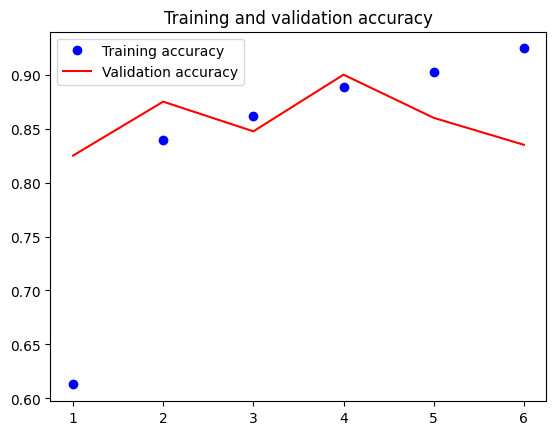

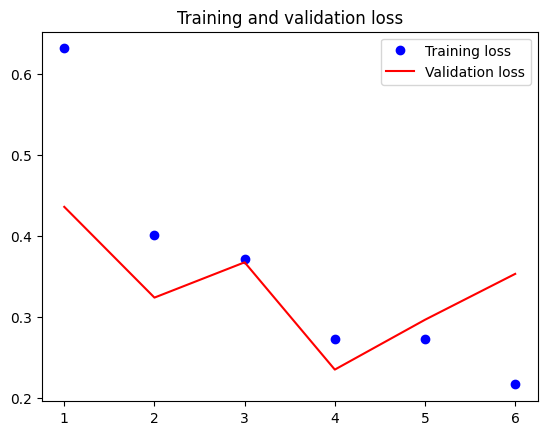

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_pvcm1.history["accuracy"]
val_accuracy = history_pvcm1.history["val_accuracy"]
loss = history_pvcm1.history["loss"]
val_loss = history_pvcm1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
pvcm1.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_22 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_110 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_111 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 1s 15ms/step - loss: 0.2502 - accuracy: 0.9100
Test accuracy: 0.910


# **III.2 -Developing a second, further improved CNN model named pvcm2 to classify Panda vs Cat using parameter regularization and then adding dropout.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid")(x)
pvcm_L2_reg = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvcm_L2_reg.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="L2regularizer.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_l2_reg = pvcm_L2_reg.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
44/44 [==============================] - 4s 54ms/step - loss: 1.1523 - accuracy: 0.6657 - val_loss: 0.9777 - val_accuracy: 0.6725
Epoch 2/30
44/44 [==============================] - 2s 45ms/step - loss: 0.7635 - accuracy: 0.8257 - val_loss: 0.8037 - val_accuracy: 0.7175
Epoch 3/30
44/44 [==============================] - 2s 45ms/step - loss: 0.5578 - accuracy: 0.8693 - val_loss: 0.5570 - val_accuracy: 0.8450
Epoch 4/30
44/44 [==============================] - 2s 45ms/step - loss: 0.4802 - accuracy: 0.8829 - val_loss: 1.9760 - val_accuracy: 0.5225
Epoch 5/30
44/44 [==============================] - 2s 46ms/step - loss: 0.4271 - accuracy: 0.8907 - val_loss: 0.5071 - val_accuracy: 0.8275
Epoch 6/30
44/44 [==============================] - 2s 49ms/step - loss: 0.3616 - accuracy: 0.9007 - val_loss: 0.3932 - val_accuracy: 0.8575
Epoch 7/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3144 - accuracy: 0.9186 - val_loss: 0.3434 - val_accuracy: 0.8925
Epoch 8/30
44

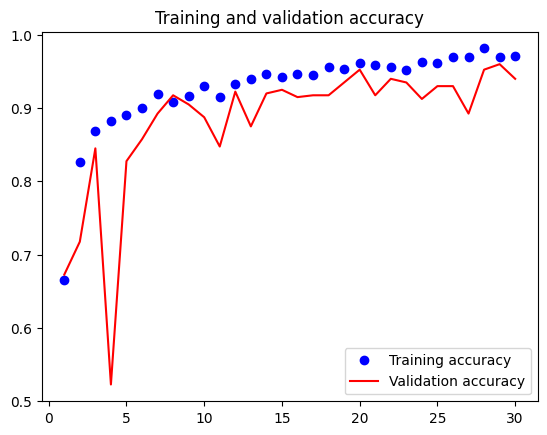

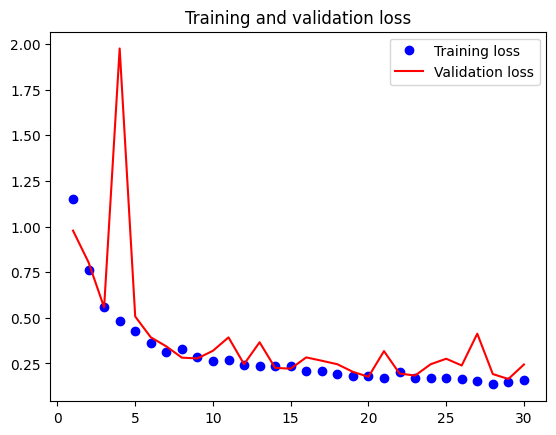

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_l2_reg.history["accuracy"]
val_accuracy = history_l2_reg.history["val_accuracy"]
loss = history_l2_reg.history["loss"]
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("L2regularizer.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 15ms/step - loss: 0.3536 - accuracy: 0.9300
Test accuracy: 0.930


# **pvcm2 using dropout with parameter regularization**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid")(x)
pvcm2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvcm2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="pvcm2.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_pvcm2 = pvcm2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
44/44 [==============================] - 4s 50ms/step - loss: 1.1373 - accuracy: 0.6457 - val_loss: 0.8649 - val_accuracy: 0.7900
Epoch 2/30
44/44 [==============================] - 2s 46ms/step - loss: 0.8323 - accuracy: 0.7943 - val_loss: 0.5892 - val_accuracy: 0.8625
Epoch 3/30
44/44 [==============================] - 2s 45ms/step - loss: 0.6716 - accuracy: 0.8350 - val_loss: 1.2066 - val_accuracy: 0.5425
Epoch 4/30
44/44 [==============================] - 2s 46ms/step - loss: 0.4929 - accuracy: 0.8771 - val_loss: 0.4728 - val_accuracy: 0.8800
Epoch 5/30
44/44 [==============================] - 3s 52ms/step - loss: 0.4316 - accuracy: 0.8807 - val_loss: 0.4268 - val_accuracy: 0.8775
Epoch 6/30
44/44 [==============================] - 2s 45ms/step - loss: 0.3764 - accuracy: 0.8971 - val_loss: 0.3162 - val_accuracy: 0.9075
Epoch 7/30
44/44 [==============================] - 2s 46ms/step - loss: 0.3135 - accuracy: 0.9129 - val_loss: 0.3096 - val_accuracy: 0.9150
Epoch 8/30
44

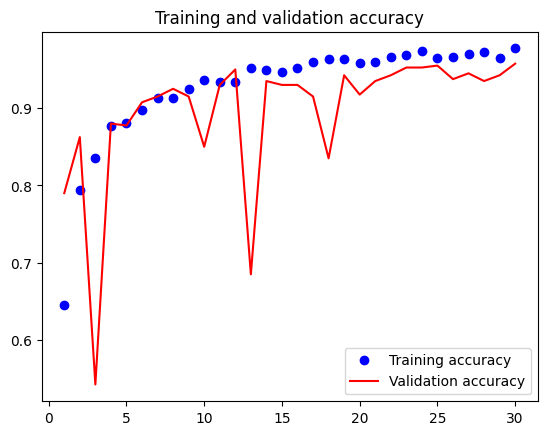

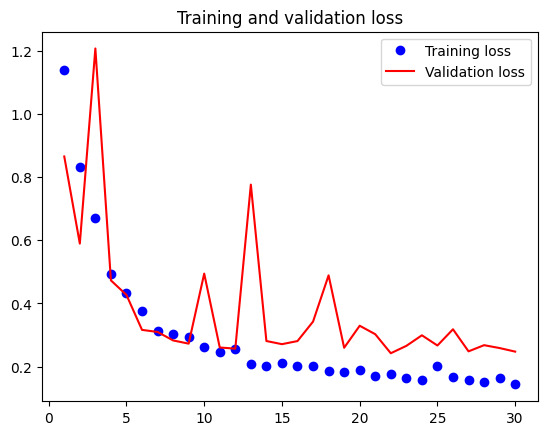

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_pvcm2.history["accuracy"]
val_accuracy = history_pvcm2.history["val_accuracy"]
loss = history_pvcm2.history["loss"]
val_loss = history_pvcm2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
pvcm2.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_24 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_120 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("pvcm2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 15ms/step - loss: 0.2648 - accuracy: 0.9500
Test accuracy: 0.950


# **III.3 -Developing a third CNN model, named pvcm3 USING DATA AUGMENTATION FOR ITS TRAINING.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.GaussianNoise(stddev=0.1),
        layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
        layers.RandomCrop(height=200, width=200),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid")(x)
pvcm3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Configuring the model for training

pvcm3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="pvcm3.keras",
        save_best_only=True,
        monitor="val_loss",
        )
]
history_pvcm3 = pvcm3.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/100
44/44 [==============================] - 4s 50ms/step - loss: 1.0999 - accuracy: 0.6321 - val_loss: 2.4718 - val_accuracy: 0.5250
Epoch 2/100
44/44 [==============================] - 2s 45ms/step - loss: 0.7541 - accuracy: 0.8143 - val_loss: 0.7127 - val_accuracy: 0.8275
Epoch 3/100
44/44 [==============================] - 2s 45ms/step - loss: 0.5690 - accuracy: 0.8586 - val_loss: 0.4968 - val_accuracy: 0.8725
Epoch 4/100
44/44 [==============================] - 2s 50ms/step - loss: 0.4601 - accuracy: 0.8843 - val_loss: 0.3795 - val_accuracy: 0.9075
Epoch 5/100
44/44 [==============================] - 2s 45ms/step - loss: 0.3713 - accuracy: 0.9086 - val_loss: 0.4279 - val_accuracy: 0.8825
Epoch 6/100
44/44 [==============================] - 2s 45ms/step - loss: 0.3560 - accuracy: 0.9079 - val_loss: 0.2884 - val_accuracy: 0.9200
Epoch 7/100
44/44 [==============================] - 2s 44ms/step - loss: 0.3245 - accuracy: 0.9171 - val_loss: 0.4066 - val_accuracy: 0.8600
Epoch 

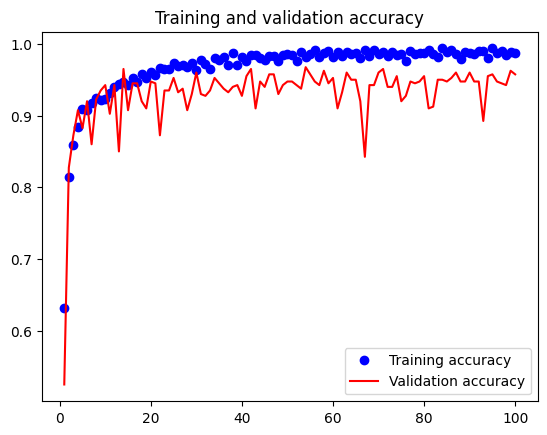

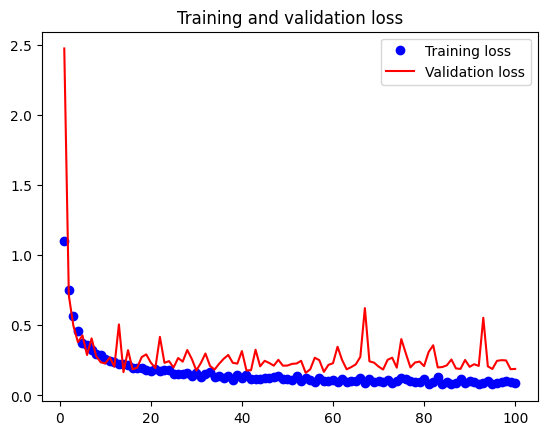

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_pvcm3.history["accuracy"]
val_accuracy = history_pvcm3.history["val_accuracy"]
loss = history_pvcm3.history["loss"]
val_loss = history_pvcm3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("pvcm3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 12ms/step - loss: 0.2700 - accuracy: 0.9550
Test accuracy: 0.955
